# Example 1

In [1]:
# rm -r output* cube.fits

In [2]:
import hifast
print(hifast.__version__)
!python -m hifast --version

v1.3a2
v1.3a2


## Download Data Files

Link: https://pan.cstcloud.cn/s/u6u3iyfdRqo

In [3]:
ls RAW_data/*

RAW_data/KY:
M33_OTF_2021_07_31_05_14_00_000.xlsx

RAW_data/M33_OTF:
20210731/


## Case 1

extended source

### Run

In [4]:
!chmod +x run_case1.sh
!cat run_case1.sh

#!/usr/bin/env bash

# Enable recursive globbing to allow ** to match all files and directories recursively
shopt -s globstar

# Step 1: Temperature Calibration
# Description: This step involves calibrating the temperature of the spectra.
echo "Temperature calibration:"
# Select the first chunk of each beam
# Note: Assumes naming convention for files as M33_OTF_1_*W_0001.fits where * is a wildcard
files="$(ls RAW_data/M33_OTF/20210731/M33_OTF_1_*W_0001.fits)"
# Display the selected files to verify correct selection
printf "${files}\n"

# Run temperature calibration on selected files
# Note: "python -m hifast.sep file.hdf5 --para1 --para2" processes only one HDF5 file at a time.
#       "python -m hifast sep -p 2 file1.hdf5 file2.hdf5 file3.hdf5 --para1 --para2" allows multiple files to be processed at the same time. 
python -m hifast sep -p 3 \
    $files \
    -d 4 -m 4 -n 596 --step 1 \
    --frange 1400 1440 \
    --smooth gaussian --s_sigma 2 \
    --check_cal A --pcal_vary_lim_bin

In [5]:
!./run_case1.sh

Temperature calibration:
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W_0001.fits
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M09_W_0001.fits
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M15_W_0001.fits
###################################Args###################################
Command Line Args:   -d 4 -m 4 -n 596 --step 1 --frange 1400 1440 --smooth gaussian --s_sigma 2 --check_cal A --pcal_vary_lim_bin 0.02 --merge_pcals True --method_merge median --method_interp linear --save_pcals True --outdir output_1/%[project]s/%[date]s RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W_0001.fits
Defaults:
  --ext-frange:      True
  --start:           1
  --sep-save:        False
  --s-deg:           1
  --noise-mode:      high
  --noise-date:      auto
  --med-filter-size-cal:5
  --freq-step-c:     4
  --pcal-bad-lim-freq:0.5
  --cal-dis-lim:     1.6
  --merge-cal-pre-process:scale
  --calc-diff-method:div
  --squeeze-diff-freq:median
  --squeeze-diff-freq-bad-lim:0.5
  -

In [6]:
!chmod +x gen_cube_case1.sh
!cat gen_cube_case1.sh

#!/usr/bin/env bash

python -m hifast.cube \
     --outname cube.fits  \
     -m gaussian  --type3 vopt \
     --range3 -1000 2000 \
     --share-mem False --step 19 --nproc 4 \
     output_1/M33_OTF_1_MultiBeamOTF/*/*fc.hdf5


In [7]:
!./gen_cube_case1.sh

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M{Beam}_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-bld_p-fc.hdf5
Beams: 1, 9, 15
r_cut: 110.83649493758648 arcsec
vopt dispersion (std) at same Ta order is between 0.0 and 2.2737367544323206e-13.
generating WCS header
ra range: (23.043467281604546, 24.617778525639775)  deg
dec range: (30.459268876067984, 30.634624192275474)  deg
bwidth: 60.0 60.0  arcsec
searching spectra in r_cut for each grid...
Part [1/1]
loading: output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M15_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-bld_p-fc.hdf5
spread these spectra into grids
assign gird to 4 processes
gathering results
Saving to cube.fits.
Saving to cube-count.fits.
Saving to cube-weights.fits.


### View results

In [8]:
import hifast.funcs as hf
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import h5py

In [9]:
!h5ls -r output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T.hdf5

/                        Group
/Header                  Group
/S                       Group
/S/Ta                    Dataset {2, 615, 5767}
/S/Tcal                  Dataset {1, 5767, 2}
/S/freq                  Dataset {5767}
/S/inds_ton              Dataset {2, 4}
/S/is_aband_whole        Dataset {2, 2}
/S/is_delay              Dataset {615}
/S/is_on                 Dataset {615}
/S/mjd                   Dataset {615}
/S/next_to_cal           Dataset {615}
/S/pcals_amp_diff_interp_values Dataset {615, 2}
/S/pcals_merged          Dataset {1, 5767, 2}
/S/pcals_merged_s        Dataset {1, 5767, 2}
/Waterfall               Group
/Waterfall/DATA          Soft Link {/S/Ta}


In [10]:
# use h5py to read the file
fpath = 'output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T.hdf5'
f = h5py.File(fpath, 'r')
print(f['S'].keys())

<KeysViewHDF5 ['Ta', 'Tcal', 'freq', 'inds_ton', 'is_aband_whole', 'is_delay', 'is_on', 'mjd', 'next_to_cal', 'pcals_amp_diff_interp_values', 'pcals_merged', 'pcals_merged_s']>


In [11]:
f.close()

#### plot RA-DEC

In [12]:
from hifast.core.radec import _tight_ra

Text(0, 0.5, 'DEC')

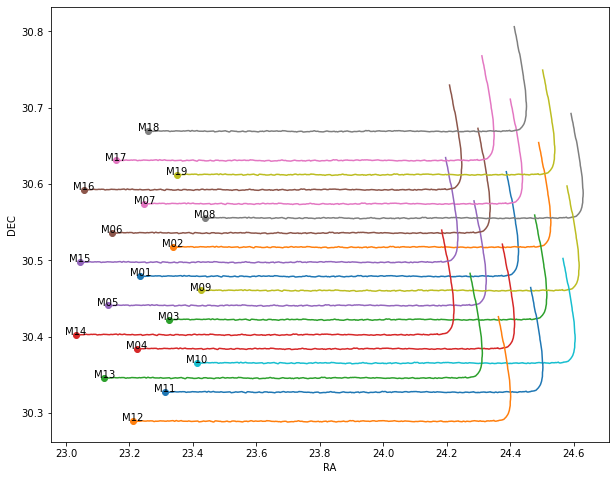

In [13]:
fpath = f'output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-radec.hdf5'
radec = hf.load_hdf5_to_dict(fpath)
plt.figure(figsize=(10,8))
for nB in range(1,20):
    dec = radec[f'dec{nB}']
    ra = _tight_ra(radec[f'ra{nB}'])
    plt.plot(ra, dec)
    plt.scatter(ra[0],dec[0])
    plt.text(ra[0], dec[0], f'M{nB:02d}', ha='center')
plt.xlabel('RA')
plt.ylabel('DEC')

#### plot spectrum

In [14]:
nB = 1
basepath = f'output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M{nB:02d}_W-20210731'

In [15]:
def plot_data(fpath, i_start, i_end, polar):
    """
    plot the average spectrum from i_start to i_end for one polarization polar
    """

    S = hf.HFSpec(fpath)
    x = freq = S['freq'][:]
    y = np.mean(S['DATA'][i_start:i_end, :, polar], axis=0, dtype=np.float64)

    plt.figure(figsize=(10, 4))
    plt.plot(x, y)
    plt.plot(x, ndimage.gaussian_filter1d(y, 3))
    plt.ylim(np.nanpercentile(y, 0), np.nanpercentile(y, 98))
    plt.title(os.path.basename(fpath))
    plt.minorticks_on()
    plt.show()


output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T.hdf5


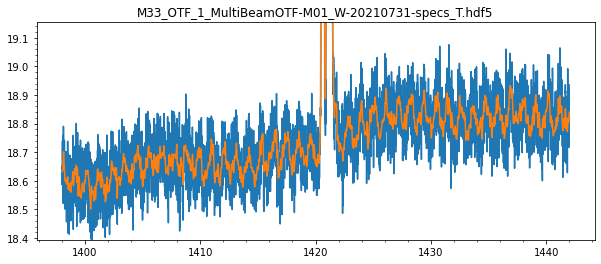

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux.hdf5


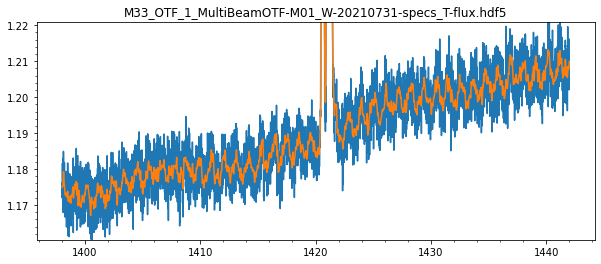

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p.hdf5


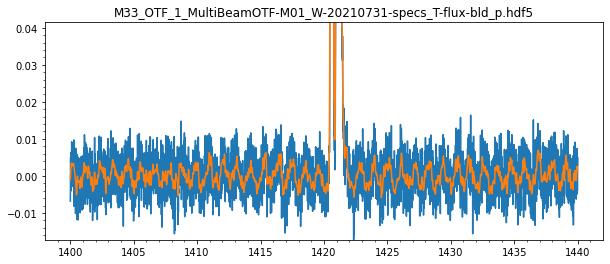

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi.hdf5


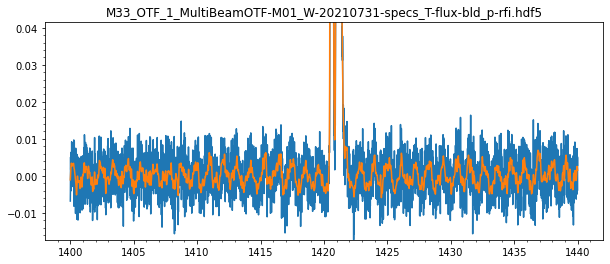

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld.hdf5


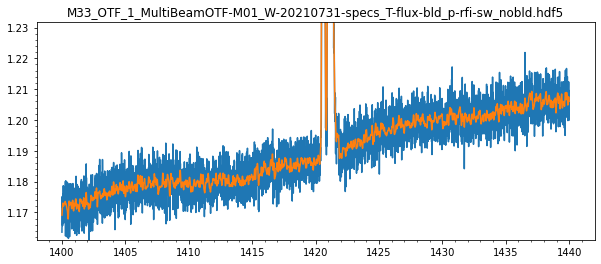

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-bld_p.hdf5


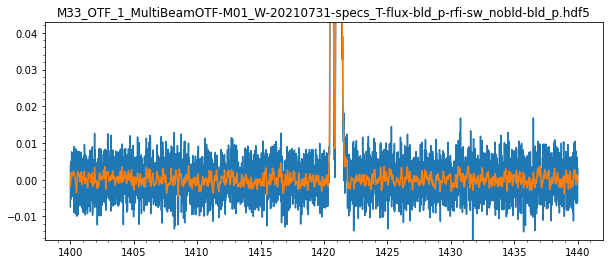

output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-bld_p-fc.hdf5


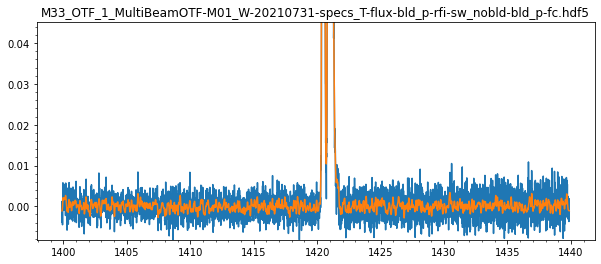

In [16]:
add_list = ['-specs_T',
            '-flux',
            '-bld_p',
            '-rfi',
            '-sw_nobld',
            '-bld_p',
            '-fc']

for i in range(len(add_list)):
    path_add = ''.join(add_list[:i+1])
    fpath = f"{basepath}{path_add}.hdf5"
    print(fpath)
    plot_data(fpath, i_start=100, i_end=120, polar=0)


#### waterfall plot

https://hifast.readthedocs.io/en/v1.3/hifast.waterfall.html

- View in Carta 3
- hifast.waterfall

#### baseline fitting parameters adjustment 

In [17]:
fpath = f'output_1/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld.hdf5'

In [18]:
%matplotlib ipympl

In [19]:
%run -m hifast.bld $fpath -i

Canvas(header_visible=False, toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Bac…

outdir: output_1/M33_OTF_1_MultiBeamOTF/20210731


In [20]:
%matplotlib inline

## Case 2

point sources

### Run

In [21]:
!chmod +x ./run_case2.sh
!cat run_case2.sh

#!/usr/bin/env bash

# Enable recursive globbing to allow ** to match all files and directories recursively
shopt -s globstar

# Step 1: Temperature Calibration
# Description: This step involves calibrating the temperature of the spectra.
echo "Temperature calibration:"
# Select the first chunk of each beam
# Note: Assumes naming convention for files as M33_OTF_1_*W_0001.fits where * is a wildcard
files="$(ls RAW_data/M33_OTF/20210731/M33_OTF_1_*W_0001.fits)"
# Display the selected files to verify correct selection
printf "${files}\n"

# Run temperature calibration on selected files
# Note: "python -m hifast.sep file.hdf5 --para1 --para2" processes only one HDF5 file at a time.
#       "python -m hifast sep -p 2 file1.hdf5 file2.hdf5 file3.hdf5 --para1 --para2" allows multiple files to be processed at the same time. 
python -m hifast sep -p 3 \
    $files \
    -d 4 -m 4 -n 596 --step 1 \
    --frange 1360 1415 \
    --smooth gaussian --s_sigma 2 \
    --check_cal A --pcal_vary_lim_bin

In [22]:
!./run_case2.sh

Temperature calibration:
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W_0001.fits
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M09_W_0001.fits
RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M15_W_0001.fits
###################################Args###################################
Command Line Args:   -d 4 -m 4 -n 596 --step 1 --frange 1360 1415 --smooth gaussian --s_sigma 2 --check_cal A --pcal_vary_lim_bin 0.02 --merge_pcals True --method_merge median --method_interp linear --save_pcals True --outdir output_2/%[project]s/%[date]s RAW_data/M33_OTF/20210731/M33_OTF_1_MultiBeamOTF-M15_W_0001.fits
Defaults:
  --ext-frange:      True
  --start:           1
  --sep-save:        False
  --s-deg:           1
  --noise-mode:      high
  --noise-date:      auto
  --med-filter-size-cal:5
  --freq-step-c:     4
  --pcal-bad-lim-freq:0.5
  --cal-dis-lim:     1.6
  --merge-cal-pre-process:scale
  --calc-diff-method:div
  --squeeze-diff-freq:median
  --squeeze-diff-freq-bad-lim:0.5
  -

In [23]:
nB = 1
basepath = f'output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M{nB:02d}_W-20210731'

In [24]:
def plot_data(fpath, i_start, i_end, polar):
    """
    plot the average spectrum from i_start to i_end for one polarization polar
    """

    S = hf.HFSpec(fpath)
    x = freq = S['freq'][:]
    y = np.mean(S['DATA'][i_start:i_end, :, polar], axis=0, dtype=np.float64)

    plt.figure(figsize=(10, 4))
    plt.plot(x, y)
    plt.plot(x, ndimage.gaussian_filter1d(y, 3))
    #plt.ylim(np.nanpercentile(y, 0), np.nanpercentile(y, 98.5))
    plt.title(os.path.basename(fpath))
    plt.minorticks_on()
    plt.show()


output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T.hdf5


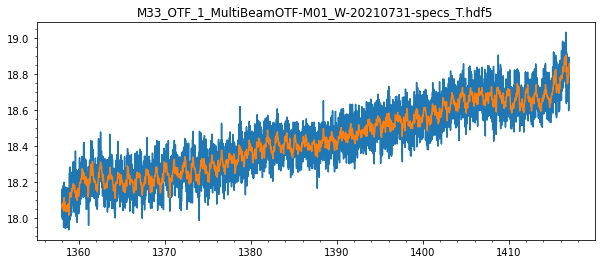

output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux.hdf5


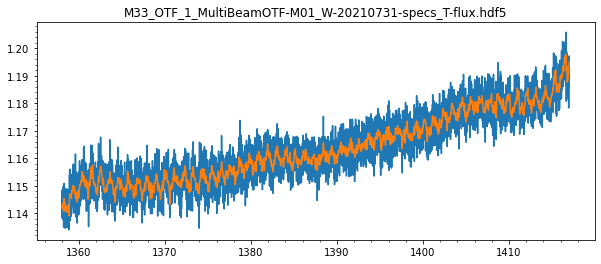

output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p.hdf5


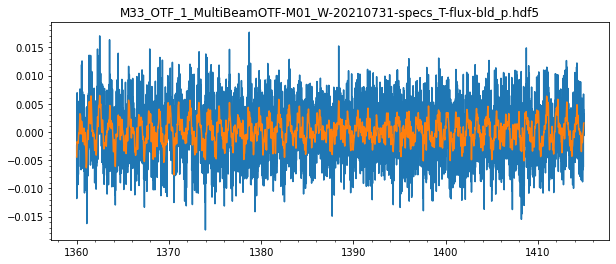

output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi.hdf5


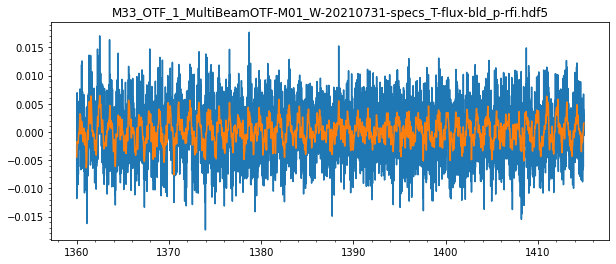

output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld.hdf5


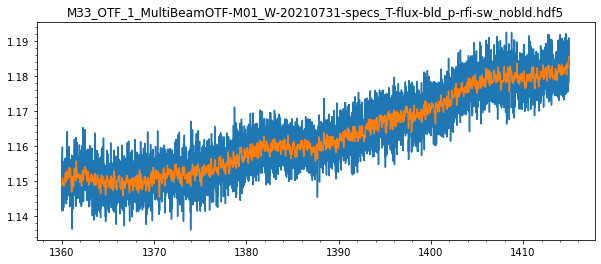

output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-ref_p.hdf5


output_2/M33_OTF_1_MultiBeamOTF/20210731/M33_OTF_1_MultiBeamOTF-M01_W-20210731-specs_T-flux-bld_p-rfi-sw_nobld-ref_p-fc.hdf5


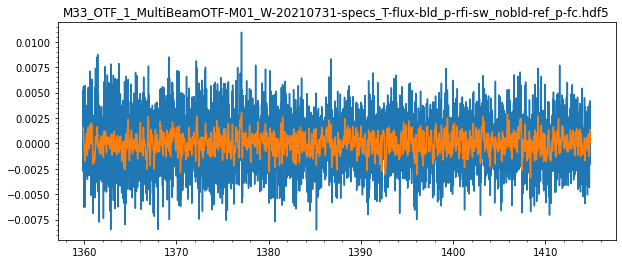

In [25]:
add_list = ['-specs_T',
            '-flux',
            '-bld_p',
            '-rfi',
            '-sw_nobld',
            '-ref_p',
            '-fc']

for i in range(len(add_list)):
    path_add = ''.join(add_list[:i+1])
    fpath = f"{basepath}{path_add}.hdf5"
    print(fpath)
    plot_data(fpath, i_start=100, i_end=120, polar=0)
